# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
'''Lệnh "%matplotlib inline" được sử dụng để đảm bảo rằng các hình ảnh được hiển thị trong phần mềm Jupyter Notebook hoặc JupyterLab và không yêu cầu mở cửa sổ riêng biệt để xem. Khi được kích hoạt, lệnh này sẽ đưa ra một giao diện dòng lệnh để tạo các hình ảnh trực tiếp trong trình duyệt web.'''

'Lệnh "%matplotlib inline" được sử dụng để đảm bảo rằng các hình ảnh được hiển thị trong phần mềm Jupyter Notebook hoặc JupyterLab và không yêu cầu mở cửa sổ riêng biệt để xem. Khi được kích hoạt, lệnh này sẽ đưa ra một giao diện dòng lệnh để tạo các hình ảnh trực tiếp trong trình duyệt web.'

# Import dataset


In [3]:
data = pd.read_csv('weatherAUS.csv')
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Description summary about dataset  Rain in Australia
-----------------------------------------
***Purpose***:

Predict next-day rain by training classification models on the target variable 

***Content***:

This dataset contains about 10 year of daily weather observations from many location across Autralia 
-----------------------------------------

# Description specify columns

***Data***: the date of observation

***location***:  the location of the weather 

***MinTemp***: The minimum temperature in degrees celsius

***MaxTemp***: The maximum temperature in degrees celsius

***Rainfall***: the amount of rainfall recorded for the day in mm

***Evaporation***: The so-called Class A pan evaporation (mm) in the 24 hours to 9am

***Sunshine***: The number of hours of bright sunshine in the day.

***WindGustDir***: The direction of the strongest wind gust in the 24 hours to midnight

***WindGustSpeed***: The speed (km/h) of the strongest wind gust in the 24 hours to midnight

***WindDir9am***: Direction of the wind at 9am



# Exploratory data analysis 

In [4]:
data.shape

(145460, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
## check null 
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
import plotly.express as px

In [8]:
def show_bar_singe(x, y, title=None):
    
    df = pd.DataFrame({'x': x, 'y': y})
    px.bar(
        df,
        x= 'x',
        y= 'y',
        text_auto='.s',
        color='x',
        title=title
    ).show()

In [9]:
def show_bar(data_sub):
    x = []
    y = []
    for name_col in data_sub.columns:
        if data_sub[name_col].isnull().sum() > 0:
            # print(f'{name_col}  has {data_sub[name_col].isnull().sum()} is null')
            x.append(name_col)
            y.append(data_sub[name_col].isnull().sum())
    df = pd.DataFrame({'x': x, 'y': y})
    px.bar(
        df,
        x= 'x',
        y= 'y',
        text_auto='.s',
        color='x'
    ).show()

In [10]:
data = data.drop(data[data.RainTomorrow.isnull()].index, axis=0)
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
# Show variable categorical
categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [12]:
data[categorical]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,ESE,E,No,No
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No


In [13]:
data.Date = pd.to_datetime(data.Date)

In [14]:
data['week'] = data.Date.dt.weekday
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year

In [15]:
data.drop('Date', inplace=True, axis=1)

In [16]:
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,week,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,0,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,1,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,3,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,4,12,2008


### Summary of categorical variables 

+ Data is variable datatime
+ There are 2 variable binary categorical: RainTomorrow and RainToday (so I convert RainTomorrow values into 0, 1)
+ RainTomorrow is target variable

### Check oulier in number variable

In [17]:
number_var  = [var for var in data.columns if data[var].dtype != 'O']
number_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'week',
 'month',
 'year']

In [18]:
data[number_var]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,week,month,year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,12,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,1,12,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2,12,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,3,12,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,4,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,1,6,2017
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,2,6,2017
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,3,6,2017
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,4,6,2017


In [19]:
def show_ourlies(data_sub):
    x = []
    y = []
    for name_col in data_sub.columns:
        desc  = data_sub[name_col].describe()
        
        iqr = desc['75%'] - desc['25%']
        lower_bound = desc['25%'] - 1.5 * iqr
        upper_bound = desc['75%'] + 1.5 * iqr
        outliers = data_sub[(data_sub[name_col] < lower_bound) | (data_sub[name_col] > upper_bound)]
        if len(outliers) > 0:
            x.append(name_col)
            y.append(len(outliers))

    show_bar_singe(x, y, title = "Statistic columns be Outlier")

In [20]:
show_ourlies(data[number_var])

So we look at plot, I see  Rainfall the most outlier, next to WindGustSpeed, WindSpeed3pm, Evaporation

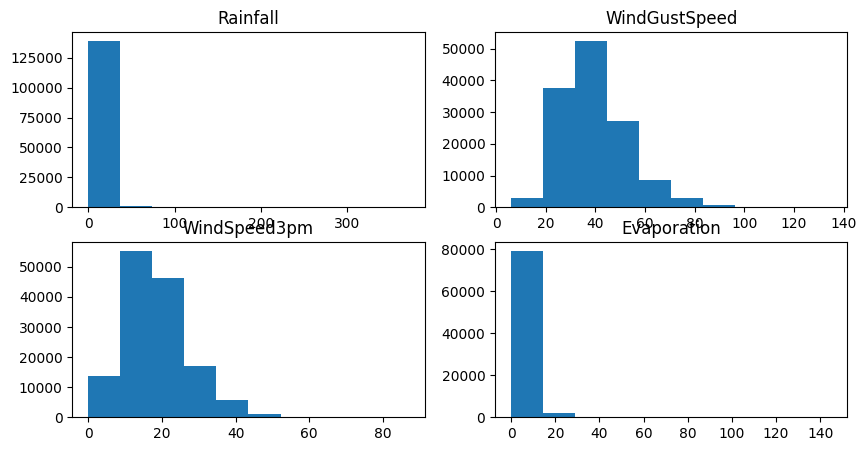

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax = ax.flatten()
col = ['Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'Evaporation']

for i, name_col in enumerate(col):
    ax[i].hist(data[name_col], bins=10)
    ax[i].set_title(name_col)

plt.show()

# Drop values null

In [22]:
show_bar(data)

In [23]:
data.Evaporation.value_counts()

Evaporation
4.0     3282
8.0     2574
2.2     2057
2.0     1996
2.6     1975
        ... 
17.1       1
19.7       1
20.5       1
18.1       1
39.6       1
Name: count, Length: 356, dtype: int64

In [24]:
len(data)

142193

In [25]:
# So i see Evaporation have the most null 

So, we see a lot of values null, do, I apply method trimmed median. It help me retain data important, and avoid values outlier

In [26]:
from scipy import stats

In [27]:
for name_col in data[number_var].columns:
    if data[name_col].isnull().sum() > 0:
        trimmed_mean = stats.trim_mean(data[name_col].value_counts().index, proportiontocut=0.2)
        data[name_col] = data[name_col].fillna(trimmed_mean)
        print(name_col)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [28]:
categorical = [x for x in categorical if x != 'Date']

In [29]:
show_bar(data[categorical])

In [30]:
# See, null quite littel

In [31]:
data.dropna(inplace=True)

# Split data

In [32]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
X_train.shape, X_test.shape

((98968, 24), (24742, 24))

# Feature Engineer

In [35]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'week', 'month', 'year'],
      dtype='object')

In [36]:
# encode variable category

# import category_encoders as ce
# encoder = ce.BinaryEncoder(cols=['RainTomorrow'])
# X_train = encoder.fit_transform(X_train)
# X_test = encoder.transform(X_test)

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [40]:
data.RainToday

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainToday, Length: 123710, dtype: object

In [37]:
X_train = pd.concat([X_train[number_var], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [38]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
29839,2.3,14.2,0.0,20.855607,7.2,50.0,6.0,20.0,81.0,44.0,...,False,False,False,False,False,False,False,False,True,False
54929,7.1,16.1,0.0,20.855607,7.2,31.0,15.0,15.0,97.0,72.0,...,False,False,False,False,False,False,False,False,False,False
32098,10.9,19.9,0.0,4.200000,8.5,44.0,9.0,24.0,54.0,29.0,...,False,False,False,False,False,False,False,False,False,True
130526,5.9,12.3,5.0,1.200000,7.2,37.0,13.0,15.0,84.0,73.0,...,False,False,False,False,False,True,False,False,False,False
45522,17.8,23.3,0.0,20.855607,7.2,31.0,9.0,15.0,78.0,77.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57322,3.8,22.8,0.0,20.855607,7.2,43.0,7.0,15.0,98.0,37.0,...,True,False,False,False,False,False,False,False,False,False
139400,25.3,32.4,2.8,4.800000,3.1,31.0,15.0,6.0,90.0,90.0,...,False,False,False,False,False,False,False,False,False,False
53908,7.8,19.2,0.0,20.855607,7.2,37.0,15.0,7.0,98.0,60.0,...,False,False,False,False,False,False,False,False,True,False
54879,1.4,12.9,2.6,20.855607,7.2,33.0,11.0,7.0,94.0,73.0,...,True,False,False,False,False,False,False,False,False,False


In [358]:
X_test = pd.concat([X_test[number_var], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

# Feature Scaling

In [359]:
from sklearn.preprocessing import MinMaxScaler

The fit_transform() method is called on X_train to calculate the parameters required for data normalization and transform the X_train data according to those parameters. Then the transform() method is called on X_test to transform the X_test data according to the parameters calculated from the X_train.

In [360]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [362]:
from sklearn.linear_model import  LogisticRegression

C là một tham số trong một số mô hình học máy như hồi quy logistic và máy vector hỗ trợ (SVM) được sử dụng để điều chỉnh mức độ điều chuẩn (regularization). Điều chuẩn là một kỹ thuật được sử dụng để giảm thiểu hiện tượng quá khớp (overfitting) bằng cách thêm một thành phần phạt vào hàm mất mát. Giá trị của C là nghịch đảo của sức mạnh điều chuẩn, tức là giá trị C càng nhỏ thì sức mạnh điều chuẩn càng lớn và ngược lại. Bạn có muốn biết thêm chi tiết không?

In [373]:
logreg = LogisticRegression(C=1, solver='liblinear', random_state=0)

In [374]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [375]:
y_pred = logreg.predict(X_test)

In [376]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [377]:
from sklearn.metrics import accuracy_score

In [378]:
print(f'ACC = {accuracy_score(y_test, y_pred)}')

ACC = 0.8531242421792903


# Check for overfitting and underfitting

In [379]:
print(f'ACC TRAIN = {logreg.score(X_train, y_train)}')
print(f'ACC TEST = {logreg.score(X_test, y_test)}')

ACC TRAIN = 0.8540538355832188
ACC TEST = 0.8531242421792903


So, ACC TRAIN and ACC Test very quite equivalen.--> No overfitting

So, ACC TRAIN and ACC Test very quite higher.--> No underfit